In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load the data

In [4]:
data=pd.read_csv(r"D:\DS PYTHON\CodeClause Project\Breast Cancer Classification\breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# count the number of rows and colunn in the dataset

In [6]:
data.shape

(569, 32)

In [7]:
# checking for the null values

In [8]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# checking for the duplicate record in the dataset

In [10]:
data.duplicated().sum()

0

In [11]:
# getting a count of the number of Malignant (M) or Benign (B) cells

In [14]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
# Visualize the count

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

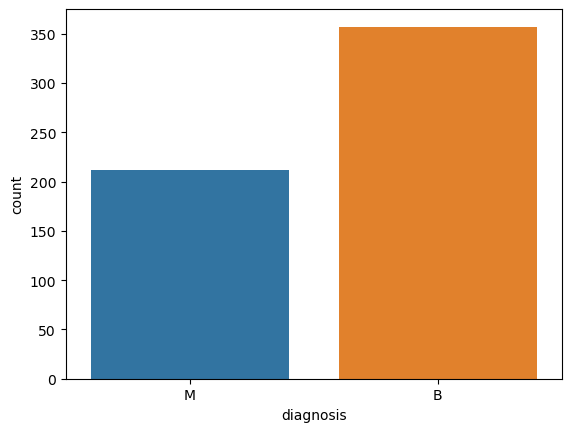

In [17]:
sb.countplot(data['diagnosis'],label='count')

In [18]:
# Look at the data type to see which columns need to be encoded

In [19]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
# Encode the categorical data values

In [22]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
data.iloc[:,1]=labelEncoder.fit_transform(data.iloc[:,1].values)

In [23]:
# create the pairplot

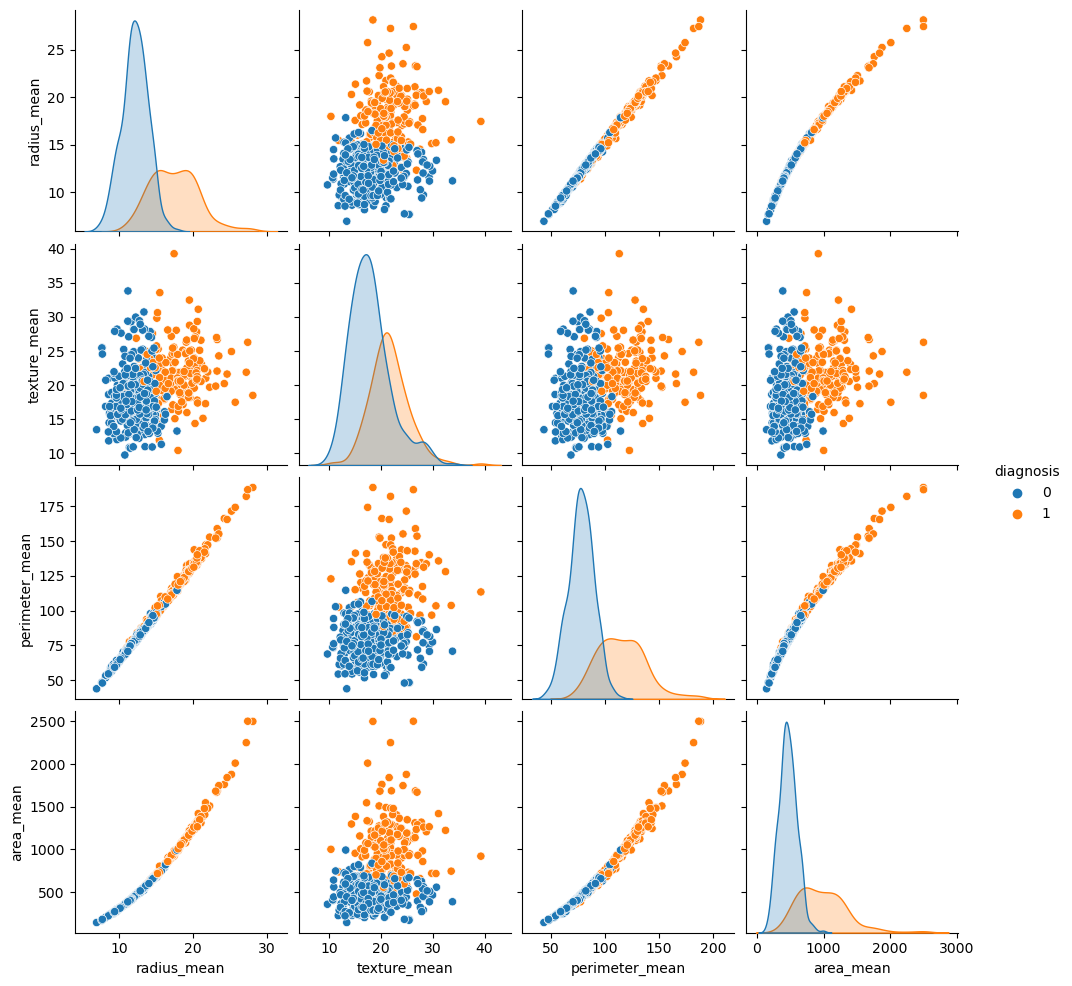

In [26]:
sb.pairplot(data.iloc[:,1:6],hue='diagnosis')

In [27]:
# Get the correlation of the column

In [29]:
data.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [30]:
# visualize the correlation

<AxesSubplot:>

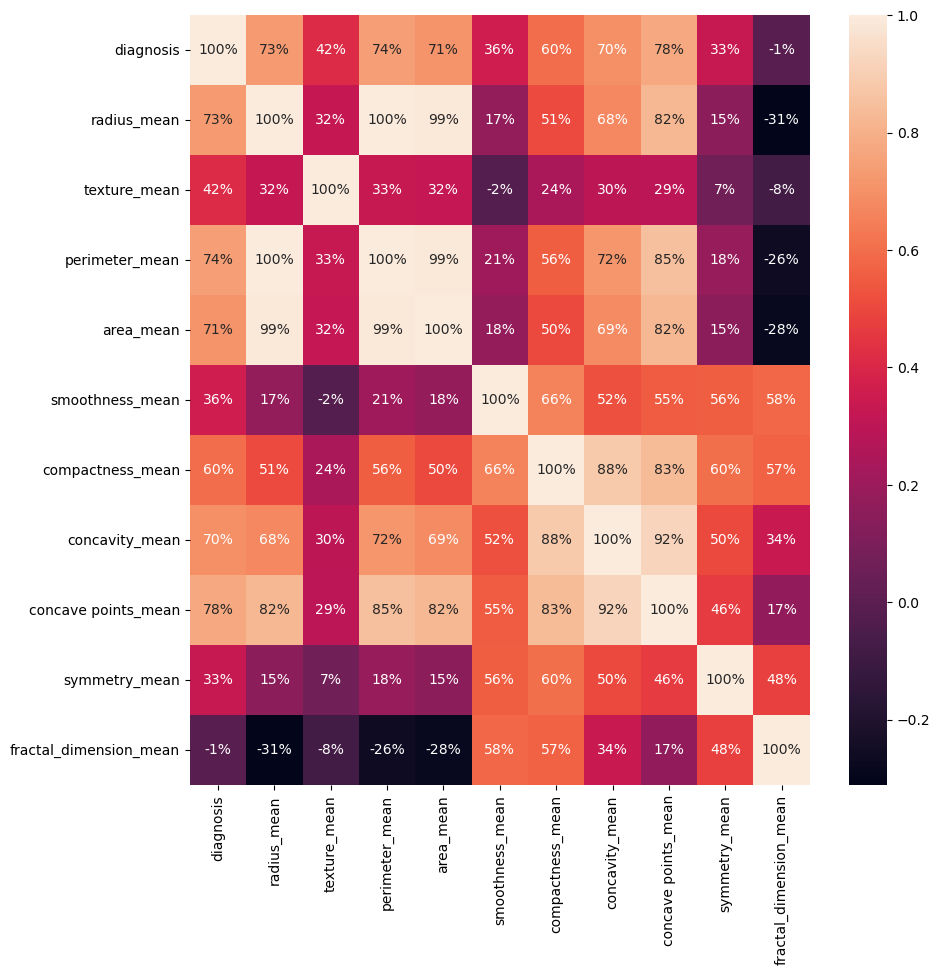

In [33]:
plt.figure(figsize=(10,10))
sb.heatmap(data.iloc[:,1:12].corr(),annot=True, fmt=".0%")

In [34]:
# split the dataset

In [35]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [36]:
# Split the dataset into training and testing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
# Scale the data (Feature Scaling)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [42]:
# Create a Function for the Models

In [60]:
def models(x_train,y_train):
    
    # Logistic Regression
    
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    
    # Decision Tree
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    
    # Random Forest Classifier
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    # Print the model accuracy on the training data
    
    print('1.Logistic Regression Training Accuracy',log.score(x_train,y_train))
    print('2.Decision Tree Classifier Training Accuracy',tree.score(x_train,y_train))
    print('3.Random Forest Classifier Training Accuracy',forest.score(x_train,y_train))
    
    return log,tree,forest

In [61]:
  # Getting all of the models

In [62]:
model=models(x_train,y_train)

1.Logistic Regression Training Accuracy 0.9906103286384976
2.Decision Tree Classifier Training Accuracy 1.0
3.Random Forest Classifier Training Accuracy 0.9976525821596244


In [63]:
# Test model accuracy on test data on confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print('Model',i)
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    
    print(cm)
    print('Testing Accuracy= ',(TP+TN)/(TP+TN+FP+FN))
    print()

Model 0
[[86  4]
 [ 2 51]]
Testing Accuracy=  0.958041958041958

Model 1
[[85  5]
 [ 3 50]]
Testing Accuracy=  0.9440559440559441

Model 2
[[88  2]
 [ 1 52]]
Testing Accuracy=  0.9790209790209791



In [67]:
# Another Way to get metrics of the models

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [69]:
for i in range(len(model)):
    print('Model',i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print(accuracy_score(y_test,model[i].predict(x_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model 1
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model 2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted av

In [70]:
# print the prediction of the Random forest classifier model

In [72]:
pred=model[2].predict(x_test)
print(pred)
print()
print(y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


## Conclusion

#### So on the training data the Decision tree classifier model perform better 
#### and on the test model accuracy on the test data Random Forest Classifier model perform better with 97% Accuracy